# Project: Sentiment Analysis on Bengali Book Reviews

In this project we will classify the sentiment of a review either it is positive or negative. To do this, we have created a dataset of $1000$ bengali book reviews. In this dataset  $528$ reviews are annotated as Positive Sentiment and another $472$ reviews as negative sentiment. All the Reviews are collected from different online book shops and then manually annotated by two native bengali speaker.  
Here, Negative Reviews are labled as 0 and Positive reviews as 1.

**Project Includes:**

-   Preprocessing 
-   Exploratory Analysis
-   Feature Extraction using TF-IDF for N-gram
-   Machine Learning Model Development
-   Evaluation Measure 
-   Saved the Final Model
-   Model Deployment

## Import Libraries

In [289]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
stopwords_list ='D:\\CSE 497\\497 Done S\\Dataset and Notebook\\book_stopwords.txt'

## Importing the Dataset

In [290]:
# Read the data and take only 1000 Reviews
#data = pd.read_excel('D:\\CSE 497\\Bengali-Book-Reviews-master\\Dataset and Notebook\\bookReviews_2000.xlsx', 'rU', encoding='windows-1252')
#data = pd.read_excel('D:\\CSE 497\\Bengali-Book-Reviews-master\\Dataset and Notebook\\bookReviews_2000.xlsx', 'rU', encoding='iso-8859-1')
#data = pd.read_excel('D:\\CSE 497\\Bengali-Book-Reviews-master\\Dataset and Notebook\\bookReviews_2000.xlsx', )#,encoding='iso-8859-1')
data = pd.read_csv('D:\\CSE 497\\497 Done S\\Dataset and Notebook\\Original Data.csv', )

#data = pd.read_csv('D:\CSE 497\Bengali-Book-Reviews-master\Dataset and Notebook\bookReviews_2000.csv')
#data = pd.read_csv('D:\\CSE 497\Bengali-Book-Reviews-master\\Dataset and Notebook\\bookReviews_2000.csv')


In [291]:
data

,Review,Sentiment
0,যে দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয...,1
1,জনগণের ভোট চুরি করে ক্ষমতায় আসা ওই নিয়ত আমাদ...,0
2,নিকোটিনের ধোয়ায় সময় কাটে রাতে । রাতটা আমার ...,1
3,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,0
4,কোন সিটিতেই কোন ভোট হিসেব হয়নি যা হচ্ছে হাসিন...,1
...,...,...
5875,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,0
5876,আমি বুঝতে পারছি না যে আমার হৃদয় ভাঙার মানে কি...,1
5877,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,0
5878,ঘুমের জন্য প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে ...,1


In [292]:
#del data['Unnamed: 0']

In [293]:
data.sample(10)

,Review,Sentiment
4026,যায় দিন যায় রাত থাকি দিশেহারা তরে ছাড়া বড় ...,1
3906,সু প্রভাত এখনো কে কে দাঁত ব্রাশ করেননি,1
250,আমি নাকি কুফা কোথাও যাইতে চাইলেই বৃষ্টি নামে,1
3122,"ভবিষ্যৎ নিয়ে যেমন কনফিজড, অতীত নিয়ে মাঝে মাঝে ...",1
84,সবাই ডিশের লাইন কেটে দিয়ে বিটিভি দেখুন । এ বছ...,1
840,ধিক তোর মত মানুষকে।,1
1256,স্বার্থক জন্ম মা গো জন্মেছি এই দেশে গাড়ীর চাপ...,1
3709,ব্যস্ততার মাঝে যাচ্ছে জীবন,0
5408,দ্যা বেস্ট প্লেয়ার ২০১৮ সবার নাম থাকলেও তালিক...,1
1772,আমরাই একমাত্র দেশ যারা গত বছরে একের পর এক যুদ্...,1


In [294]:
data.Sentiment = data.Sentiment.replace({1:'Positive',0:'Negative'})
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.Sentiment =='Positive']),
      "\nTotal Negative Reviews:",len(data[data.Sentiment=='Negative']))

Total Reviews: 5880 
Total Positive Reviews: 2940 
Total Negative Reviews: 2940


In [295]:
print(data.dtypes)

Review       object
Sentiment    object
dtype: object


In [296]:
data

,Review,Sentiment
0,যে দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয...,Positive
1,জনগণের ভোট চুরি করে ক্ষমতায় আসা ওই নিয়ত আমাদ...,Negative
2,নিকোটিনের ধোয়ায় সময় কাটে রাতে । রাতটা আমার ...,Positive
3,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,Negative
4,কোন সিটিতেই কোন ভোট হিসেব হয়নি যা হচ্ছে হাসিন...,Positive
...,...,...
5875,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,Negative
5876,আমি বুঝতে পারছি না যে আমার হৃদয় ভাঙার মানে কি...,Positive
5877,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,Negative
5878,ঘুমের জন্য প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে ...,Positive


In [297]:
# print some unprocessed reviews
sample_data = [10,100,150,200,250,300,350,400,450,500,600,650,700,750,800]
for i in sample_data:
      print(data.Review[i],'\n','Sentiment:-- ',data.Sentiment[i],'\n')  

জামায়াত কেন্ যে রাজশাহী অার বরিশালে তাদের প্রার্থী দিলো না তাহলে নিশ্চিত বিএনপি অারো ২টি মেয়র পেতেন  
 Sentiment:--  Positive 

পেঙ্গুইন যদি মন্ত্রী হয় ! তাহলে কাউয়া র দোষ কি ? সারাটা দিন ট্রমার মধ্যে গেছে , ভিডিও টা দেখার পর ঠিক থাকা অসম্ভব ছিল তখন । কি কপাল ছেলেমেয়ে গুলোর  
 Sentiment:--  Positive 

তোমাদের প্রতিযোগিতার ফলাফল হিসেবে আমরা আমাদের মৃত্যু মেনে নিয়েছি !  
 Sentiment:--  Positive 

আর ভালো লাগেনা যাইতে ইচ্ছা হয় না কিন্তু যেতে হবে সব রেডি কইরা দিছে বাড়িতে এত আদর সবাইকে মিস করবো  
 Sentiment:--  Positive 

আমি নাকি কুফা কোথাও যাইতে চাইলেই বৃষ্টি নামে 
 Sentiment:--  Positive 

বিয়ের প্রথম বছরঃ জানু দ্বিতীয় বছরঃওগো শুনছ ! তৃতীয় বছরঃকই গো তুমি চতুর্থ বছরঃ বল্টুর বাপ একটু এখানে আসো তো পঞ্চম বছরঃকোথায় মরছ ? ষষ্ঠ বছরঃ আজকে বাসায় আসো তোমার একদিন কি আমার একদিন ! তোমায় বিয়ে করে আমার জীবনটা তেজপাতা হয়ে গেছে ! তোমায় বিয়ে করে কি পাইছি আমি ?  
 Sentiment:--  Positive 

চৌকিদার , ঠেকেদার , ভাগীদার নয় সংবিধান সমঝদার একজন প্রধানমন্ত্রী প্রয়োজন  
 Sentiment:--  Positive 

## Data Processing 
This step includes removal of punctuation mark, numbers, emoji and stopwords from the reviews. We have used a helper functions for cleaning the corpus.
 

In [298]:
from utils import cleaned_reviews,stopwords_info,stopword_removal,process_reviews

In [299]:
# Apply the function into the dataframe
data['cleaned'] = data['Review'].apply(process_reviews,stopwords = stopwords_list,removing_stopwords = True)  

# print some cleaned reviews from the dataset
sample_data = [10,100,150,200,250,300,350,400,450,500,600,650,700,750,800]
for i in sample_data:
      print('Original:\n',data.Review[i],'\nCleaned:\n',data.cleaned[i],'\n','Sentiment:-- ',data.Sentiment[i],'\n')   

Original:
 জামায়াত কেন্ যে রাজশাহী অার বরিশালে তাদের প্রার্থী দিলো না তাহলে নিশ্চিত বিএনপি অারো ২টি মেয়র পেতেন  
Cleaned:
 জামায়াত কেন্ রাজশাহী অার বরিশালে তাদের প্রার্থী দিলো না তাহলে নিশ্চিত বিএনপি অারো ২টি মেয়র পেতেন 
 Sentiment:--  Positive 

Original:
 পেঙ্গুইন যদি মন্ত্রী হয় ! তাহলে কাউয়া র দোষ কি ? সারাটা দিন ট্রমার মধ্যে গেছে , ভিডিও টা দেখার পর ঠিক থাকা অসম্ভব ছিল তখন । কি কপাল ছেলেমেয়ে গুলোর  
Cleaned:
 পেঙ্গুইন যদি মন্ত্রী হয় তাহলে কাউয়া র দোষ সারাটা দিন ট্রমার মধ্যে গেছে ভিডিও টা দেখার পর ঠিক থাকা অসম্ভব ছিল তখন কপাল ছেলেমেয়ে গুলোর 
 Sentiment:--  Positive 

Original:
 তোমাদের প্রতিযোগিতার ফলাফল হিসেবে আমরা আমাদের মৃত্যু মেনে নিয়েছি !  
Cleaned:
 তোমাদের প্রতিযোগিতার ফলাফল হিসেবে আমরা আমাদের মৃত্যু মেনে নিয়েছি 
 Sentiment:--  Positive 

Original:
 আর ভালো লাগেনা যাইতে ইচ্ছা হয় না কিন্তু যেতে হবে সব রেডি কইরা দিছে বাড়িতে এত আদর সবাইকে মিস করবো  
Cleaned:
 ভালো লাগেনা যাইতে ইচ্ছা হয় না কিন্তু যেতে হবে সব রেডি কইরা দিছে বাড়িতে এত আদর সবাইকে মিস করবো 
 Sentiment

In [300]:
data

,Review,Sentiment,cleaned
0,যে দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয...,Positive,দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয় হ...
1,জনগণের ভোট চুরি করে ক্ষমতায় আসা ওই নিয়ত আমাদ...,Negative,জনগণের ভোট চুরি ক্ষমতায় আসা ওই নিয়ত আমাদের ন...
2,নিকোটিনের ধোয়ায় সময় কাটে রাতে । রাতটা আমার ...,Positive,নিকোটিনের ধোয়ায় সময় কাটে রাতে রাতটা দিন দিন...
3,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,Negative,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ
4,কোন সিটিতেই কোন ভোট হিসেব হয়নি যা হচ্ছে হাসিন...,Positive,সিটিতেই ভোট হিসেব হয়নি যা হচ্ছে হাসিনার ইচ্ছে...
...,...,...,...
5875,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,Negative,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...
5876,আমি বুঝতে পারছি না যে আমার হৃদয় ভাঙার মানে কি...,Positive,বুঝতে পারছি না হৃদয় ভাঙার মানে বল
5877,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,Negative,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...
5878,ঘুমের জন্য প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে ...,Positive,ঘুমের প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে নামই ...


In [301]:
data.cleaned.to_excel('clean_reviews.xlsx')

##### Processing of a sample review

In [302]:
tweet = 'অনুবাদ এর মান আরো ভালো করা উচিত ছিল।😔'
stopwords_list ='D:\\CSE 497\\497 Done S\\Dataset and Notebook\\book_stopwords.txt'
process_reviews(review = tweet, stopwords =stopwords_list,removing_stopwords=True)

'অনুবাদ মান আরো ভালো করা উচিত ছিল'

## Dataset Summary

In [303]:
from utils import data_summary
documents,words,u_words,class_names = data_summary(data)


Class Name :  Positive
Number of Documents:2940
Number of Words:52755
Number of Unique Words:4681
Most Frequent Words:

না	1040
নেই	270
নাই	255
কিছু	250
আজ	230
করতে	225
কিন্তু	215
হবে	210
এক	210
মানুষ	210

Class Name :  Negative
Number of Documents:2940
Number of Words:54385
Number of Unique Words:4781
Most Frequent Words:

না	695
হয়	365
হবে	260
মানুষ	240
কিন্তু	185
ভালো	185
যায়	185
আমাদের	180
আল্লাহ	180
কিছু	180


### Dataset Summary Visualization

In [304]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
print(df)

  Class Names         Category  Values
0    Positive  Total Documents    2940
1    Negative  Total Documents    2940
2    Positive      Total Words   52755
3    Negative      Total Words   54385
4    Positive     Unique Words    4681
5    Negative     Unique Words    4781


In [305]:
data

,Review,Sentiment,cleaned
0,যে দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয...,Positive,দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয় হ...
1,জনগণের ভোট চুরি করে ক্ষমতায় আসা ওই নিয়ত আমাদ...,Negative,জনগণের ভোট চুরি ক্ষমতায় আসা ওই নিয়ত আমাদের ন...
2,নিকোটিনের ধোয়ায় সময় কাটে রাতে । রাতটা আমার ...,Positive,নিকোটিনের ধোয়ায় সময় কাটে রাতে রাতটা দিন দিন...
3,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,Negative,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ
4,কোন সিটিতেই কোন ভোট হিসেব হয়নি যা হচ্ছে হাসিন...,Positive,সিটিতেই ভোট হিসেব হয়নি যা হচ্ছে হাসিনার ইচ্ছে...
...,...,...,...
5875,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,Negative,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...
5876,আমি বুঝতে পারছি না যে আমার হৃদয় ভাঙার মানে কি...,Positive,বুঝতে পারছি না হৃদয় ভাঙার মানে বল
5877,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,Negative,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...
5878,ঘুমের জন্য প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে ...,Positive,ঘুমের প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে নামই ...


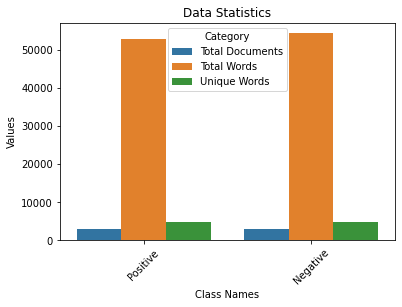

In [306]:
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);
plt.savefig('data_statistics.png',dpi = 600,bbox_inches = 'tight')

### Review Length Distribution

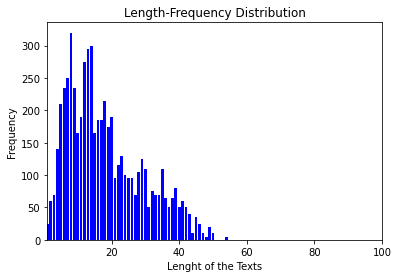

Maximum Length of a review: 54
Average Length of a reviews: 18.0


In [307]:
# Calculate the Review of each of the Review
data['ReviewLength'] = data.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in data.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 100)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.savefig('length_dist.png',dpi = 600,bbox_inches = 'tight')
plt.show()  
print(f"Maximum Length of a review: {max(data.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(data.ReviewLength),0)}")


### Save the cleaned data and stopwords into a pickle file

In [308]:
cleaned_data = pd.read_excel('clean_reviews.xlsx')
import pickle
# open a file, where you ant to store the data
file = open('D:\\CSE 497\\497 Done S\\Dataset and Notebook\\book_review_data.pkl', 'wb')

# dump information to that file
pickle.dump(cleaned_data, file)

In [309]:
data

,Review,Sentiment,cleaned,ReviewLength
0,যে দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয...,Positive,দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয় হ...,40
1,জনগণের ভোট চুরি করে ক্ষমতায় আসা ওই নিয়ত আমাদ...,Negative,জনগণের ভোট চুরি ক্ষমতায় আসা ওই নিয়ত আমাদের ন...,28
2,নিকোটিনের ধোয়ায় সময় কাটে রাতে । রাতটা আমার ...,Positive,নিকোটিনের ধোয়ায় সময় কাটে রাতে রাতটা দিন দিন...,9
3,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,Negative,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,9
4,কোন সিটিতেই কোন ভোট হিসেব হয়নি যা হচ্ছে হাসিন...,Positive,সিটিতেই ভোট হিসেব হয়নি যা হচ্ছে হাসিনার ইচ্ছে...,35
...,...,...,...,...
5875,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,Negative,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,18
5876,আমি বুঝতে পারছি না যে আমার হৃদয় ভাঙার মানে কি...,Positive,বুঝতে পারছি না হৃদয় ভাঙার মানে বল,7
5877,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,Negative,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,23
5878,ঘুমের জন্য প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে ...,Positive,ঘুমের প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে নামই ...,8


In [310]:
#data = open('D:\\CSE 497\\Bengali-Book-Reviews-master\\book_review_data.pkl','rb')
#data = pickle.load(data)


In [311]:
data

,Review,Sentiment,cleaned,ReviewLength
0,যে দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয...,Positive,দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয় হ...,40
1,জনগণের ভোট চুরি করে ক্ষমতায় আসা ওই নিয়ত আমাদ...,Negative,জনগণের ভোট চুরি ক্ষমতায় আসা ওই নিয়ত আমাদের ন...,28
2,নিকোটিনের ধোয়ায় সময় কাটে রাতে । রাতটা আমার ...,Positive,নিকোটিনের ধোয়ায় সময় কাটে রাতে রাতটা দিন দিন...,9
3,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,Negative,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,9
4,কোন সিটিতেই কোন ভোট হিসেব হয়নি যা হচ্ছে হাসিন...,Positive,সিটিতেই ভোট হিসেব হয়নি যা হচ্ছে হাসিনার ইচ্ছে...,35
...,...,...,...,...
5875,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,Negative,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,18
5876,আমি বুঝতে পারছি না যে আমার হৃদয় ভাঙার মানে কি...,Positive,বুঝতে পারছি না হৃদয় ভাঙার মানে বল,7
5877,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,Negative,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,23
5878,ঘুমের জন্য প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে ...,Positive,ঘুমের প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে নামই ...,8


In [315]:
stp = open(stopwords_list,'r', encoding='iso-8859-1').read().split()#encoding='utf-8').read().split()
# pickle stopwords
import pickle
# open a file, where you ant to store the data
file = open('D:\\CSE 497\\497 Done S\\Dataset and Notebook\\book_stopwords.pkl', 'wb')

# dump information to that file
pickle.dump(stp, file)

In [316]:
data

,Review,Sentiment,cleaned,ReviewLength
0,যে দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয...,Positive,দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয় হ...,40
1,জনগণের ভোট চুরি করে ক্ষমতায় আসা ওই নিয়ত আমাদ...,Negative,জনগণের ভোট চুরি ক্ষমতায় আসা ওই নিয়ত আমাদের ন...,28
2,নিকোটিনের ধোয়ায় সময় কাটে রাতে । রাতটা আমার ...,Positive,নিকোটিনের ধোয়ায় সময় কাটে রাতে রাতটা দিন দিন...,9
3,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,Negative,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,9
4,কোন সিটিতেই কোন ভোট হিসেব হয়নি যা হচ্ছে হাসিন...,Positive,সিটিতেই ভোট হিসেব হয়নি যা হচ্ছে হাসিনার ইচ্ছে...,35
...,...,...,...,...
5875,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,Negative,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,18
5876,আমি বুঝতে পারছি না যে আমার হৃদয় ভাঙার মানে কি...,Positive,বুঝতে পারছি না হৃদয় ভাঙার মানে বল,7
5877,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,Negative,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,23
5878,ঘুমের জন্য প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে ...,Positive,ঘুমের প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে নামই ...,8


In [317]:
data1 = open('D:\\CSE 497\\497 Done S\\Dataset and Notebook\\book_stopwords.pkl','rb')
#data1 = pickle.load(data1)
data1 = pickle.load(data1)

#while True: #check for end of file
    #try:
       # data1.append(pickle.load(data1)) # append record from file to end of list
    #except EOFError:
     #   break
#data1.close()


In [318]:
data

,Review,Sentiment,cleaned,ReviewLength
0,যে দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয...,Positive,দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয় হ...,40
1,জনগণের ভোট চুরি করে ক্ষমতায় আসা ওই নিয়ত আমাদ...,Negative,জনগণের ভোট চুরি ক্ষমতায় আসা ওই নিয়ত আমাদের ন...,28
2,নিকোটিনের ধোয়ায় সময় কাটে রাতে । রাতটা আমার ...,Positive,নিকোটিনের ধোয়ায় সময় কাটে রাতে রাতটা দিন দিন...,9
3,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,Negative,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,9
4,কোন সিটিতেই কোন ভোট হিসেব হয়নি যা হচ্ছে হাসিন...,Positive,সিটিতেই ভোট হিসেব হয়নি যা হচ্ছে হাসিনার ইচ্ছে...,35
...,...,...,...,...
5875,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,Negative,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,18
5876,আমি বুঝতে পারছি না যে আমার হৃদয় ভাঙার মানে কি...,Positive,বুঝতে পারছি না হৃদয় ভাঙার মানে বল,7
5877,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,Negative,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,23
5878,ঘুমের জন্য প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে ...,Positive,ঘুমের প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে নামই ...,8


## Feature Extraction Using TF-IDF

In [319]:
from utils import calc_unigram_tfidf,calc_bigram_tfidf,calc_trigram_tfidf,show_tfidf

In [320]:
print(data.dtypes)

Review          object
Sentiment       object
cleaned         object
ReviewLength     int64
dtype: object


In [321]:
data

,Review,Sentiment,cleaned,ReviewLength
0,যে দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয...,Positive,দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয় হ...,40
1,জনগণের ভোট চুরি করে ক্ষমতায় আসা ওই নিয়ত আমাদ...,Negative,জনগণের ভোট চুরি ক্ষমতায় আসা ওই নিয়ত আমাদের ন...,28
2,নিকোটিনের ধোয়ায় সময় কাটে রাতে । রাতটা আমার ...,Positive,নিকোটিনের ধোয়ায় সময় কাটে রাতে রাতটা দিন দিন...,9
3,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,Negative,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,9
4,কোন সিটিতেই কোন ভোট হিসেব হয়নি যা হচ্ছে হাসিন...,Positive,সিটিতেই ভোট হিসেব হয়নি যা হচ্ছে হাসিনার ইচ্ছে...,35
...,...,...,...,...
5875,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,Negative,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,18
5876,আমি বুঝতে পারছি না যে আমার হৃদয় ভাঙার মানে কি...,Positive,বুঝতে পারছি না হৃদয় ভাঙার মানে বল,7
5877,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,Negative,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,23
5878,ঘুমের জন্য প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে ...,Positive,ঘুমের প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে নামই ...,8


del data['Unnamed: 0']

In [322]:
data.cleaned=data.cleaned.astype(str)

In [323]:
print(data.dtypes)

Review          object
Sentiment       object
cleaned         object
ReviewLength     int64
dtype: object


In [324]:
tweet= 'বইটা ফালতু'
cv,feature_vector = calc_unigram_tfidf(data.cleaned)  
print("Shape of TF-IDF Corpus =====>",feature_vector.shape,'\n')
show_tfidf(cv,tweet)
#first_vector = tfidf.transform([samp_review]).toarray()

Shape of TF-IDF Corpus =====> (5880, 7826) 

Sample Review:  বইটা ফালতু
      tfidf
বইটা    1.0
ঃ       0.0


In [325]:
#help(calc_unigram_tfidf)

In [326]:
data

,Review,Sentiment,cleaned,ReviewLength
0,যে দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয...,Positive,দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয় হ...,40
1,জনগণের ভোট চুরি করে ক্ষমতায় আসা ওই নিয়ত আমাদ...,Negative,জনগণের ভোট চুরি ক্ষমতায় আসা ওই নিয়ত আমাদের ন...,28
2,নিকোটিনের ধোয়ায় সময় কাটে রাতে । রাতটা আমার ...,Positive,নিকোটিনের ধোয়ায় সময় কাটে রাতে রাতটা দিন দিন...,9
3,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,Negative,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,9
4,কোন সিটিতেই কোন ভোট হিসেব হয়নি যা হচ্ছে হাসিন...,Positive,সিটিতেই ভোট হিসেব হয়নি যা হচ্ছে হাসিনার ইচ্ছে...,35
...,...,...,...,...
5875,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,Negative,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,18
5876,আমি বুঝতে পারছি না যে আমার হৃদয় ভাঙার মানে কি...,Positive,বুঝতে পারছি না হৃদয় ভাঙার মানে বল,7
5877,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,Negative,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,23
5878,ঘুমের জন্য প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে ...,Positive,ঘুমের প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে নামই ...,8


## ML Model Development Using Unigram Feature

### Unigram Tf-idf Feature Extraction, Label Encoding and Splitting

In [329]:
from utils import label_encoding,dataset_split
from utils import calc_unigram_tfidf

# calculate the Unigram Tf-idf feature
cv,feature_vector = calc_unigram_tfidf(data.cleaned) 
# Encode the labels
lables = label_encoding(data.Sentiment,False)
# Split the Feature into train and test set
#X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,sentiment=lables)
#X_train,X_test,y_train,y_test = dataset_split(test_size=0.3,feature_space=feature_vector,sentiment=lables)
X = data.drop('Sentiment', axis=1)
y = data['Sentiment']

# Spliting train & test
X_train, X_test, y_train, y_test = train_test_split(feature_vector, lables, 
                                                    test_size=0.3, 
                                                    random_state=70,
                                                    shuffle=True)


### Model Defination

In [330]:
from utils import model_performace,ml_models_for_unigram_tfidf

## classifiers defination
ml_models,model_names = ml_models_for_unigram_tfidf() 

# call model accuracy function and save the metrices into a dictionary
accuracy = {f'{model_names[i]}':model_performace(model,X_train,X_test,y_train,y_test) for i,model in enumerate(ml_models)}
# Save the performance parameter into json file
with open('ml_performance_unigram.json', 'w') as f:
    json.dump(accuracy, f)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


### Performance Table  

In [333]:
from utils import performance_table

# Load the json file
accuracy = json.load(open('ml_performance_unigram.json'))
table = performance_table(accuracy)
table

,Accuracy,Precision,Recall,F1 Score
LR,98.75,99.09,98.42,98.76
DT,99.72,100.00,99.44,99.72
RF,100.00,100.00,100.00,100.00
MNB,99.09,98.23,100.00,99.11
KNN,97.05,97.72,96.40,97.05
Linear SVM,95.24,95.07,95.50,95.28
RBF SVM,96.60,96.10,97.18,96.64
SGD,99.66,99.33,100.00,99.66


In [334]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")


Highest Accuracy achieved by RF at = 100.0
Highest F1-Score achieved by RF at = 100.0
Highest Precision Score achieved by DT at = 100.0
Highest Recall Score achieved by RF at = 100.0


### ROC Curve

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


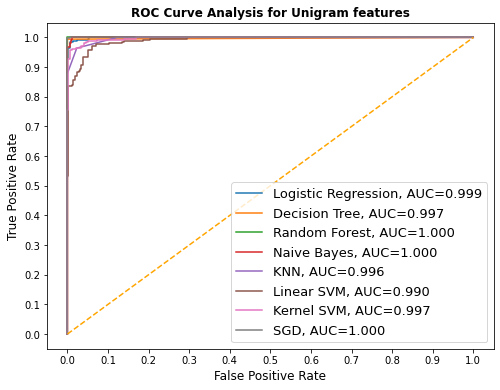

In [335]:
from utils import plot_roc_curve,ml_models_for_unigram_tfidf
## classifiers defination
gram_models = ml_models_for_unigram_tfidf() 

plot_roc_curve(gram_models,X_train,X_test,y_train,y_test,'Unigram')

### Precision-Recall Curve

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


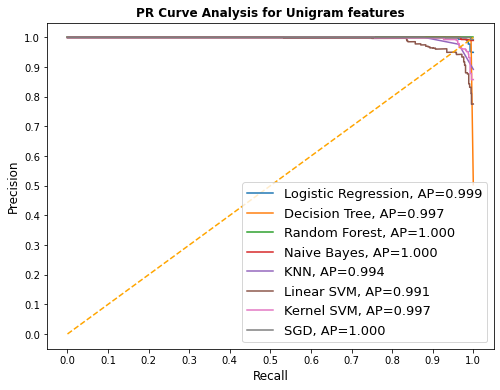

In [336]:
from utils import plot_PR_curve,ml_models_for_unigram_tfidf

gram_models = ml_models_for_unigram_tfidf()

plot_PR_curve(gram_models,X_train,X_test,y_train,y_test,'Unigram')

## Model Development Using Bigram Feature

### Bi-gram Tf-idf Feature Extraction, Label Encoding and Splitting

In [337]:
from utils import label_encoding,dataset_split
from utils import calc_bigram_tfidf

# calculate the Bigram Tf-idf feature
cv,feature_vector = calc_bigram_tfidf(data.cleaned) 
# Encode the labels
lables = label_encoding(data.Sentiment,False)
# Split the Feature into train and test set
#X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,sentiment=lables)
X_train, X_test, y_train, y_test = train_test_split(feature_vector, lables, 
                                                    test_size=0.3, 
                                                    random_state=70,
                                                    shuffle=True)


### Model Defination

In [338]:
from utils import model_performace,ml_models_for_bigram_tfidf
                
# Classifiers Defination
ml_models,model_names = ml_models_for_bigram_tfidf() 

# call model accuracy function and save the metrices into a dictionary
accuracy = {f'{model_names[i]}':model_performace(model,X_train,X_test,y_train,y_test) for i,model in enumerate(ml_models)}
# Save the performance parameter into json file
with open('ml_performance_bigram.json', 'w') as f:
    json.dump(accuracy, f)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


### Performance Table

In [339]:
from utils import performance_table

# Load the json file
accuracy = json.load(open('ml_performance_bigram.json'))
table = performance_table(accuracy)
table

,Accuracy,Precision,Recall,F1 Score
LR,99.94,99.89,100.00,99.94
DT,99.43,99.44,99.44,99.44
RF,100.00,100.00,100.00,100.00
MNB,99.43,99.44,99.44,99.44
KNN,98.64,100.00,97.30,98.63
Linear SVM,99.72,99.89,99.55,99.72
RBF SVM,99.72,99.89,99.55,99.72
SGD,100.00,100.00,100.00,100.00


In [340]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")


Highest Accuracy achieved by RF at = 100.0
Highest F1-Score achieved by RF at = 100.0
Highest Precision Score achieved by RF at = 100.0
Highest Recall Score achieved by LR at = 100.0


### ROC Curve

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


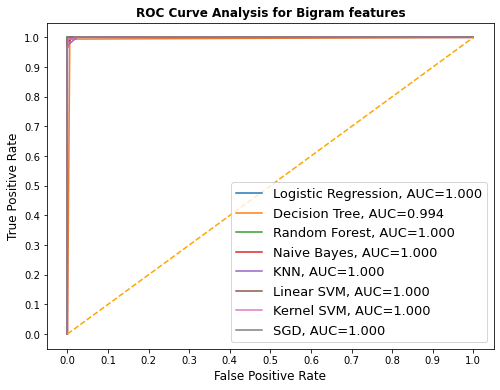

In [341]:
from utils import plot_roc_curve,ml_models_for_bigram_tfidf
## classifiers defination
gram_models = ml_models_for_bigram_tfidf()

plot_roc_curve(gram_models,X_train,X_test,y_train,y_test,'Bigram')

## Precision-Recall Curve

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


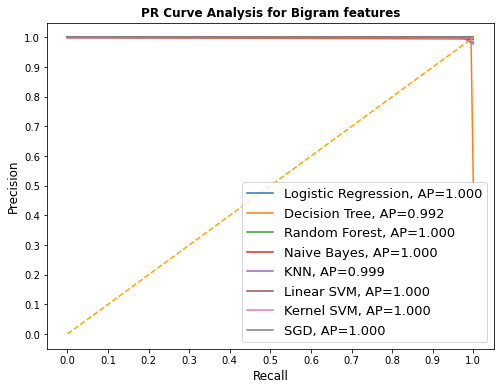

In [342]:
from utils import plot_PR_curve,ml_models_for_bigram_tfidf
## classifiers defination
gram_models = ml_models_for_bigram_tfidf()

plot_PR_curve(gram_models,X_train,X_test,y_train,y_test,'Bigram')

## Model Development Using Tri-gram Feature

### Tri-gram Tf-idf Feature Extraction, Label Encoding and Splitting

In [344]:
from utils import label_encoding,dataset_split
from utils import calc_trigram_tfidf

# calculate the Tri-gram Tf-idf feature
cv,feature_vector = calc_trigram_tfidf(data.cleaned) 
# Encode the labels
lables = label_encoding(data.Sentiment,False)
# Split the Feature into train and test set
#X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,sentiment=lables)
X_train, X_test, y_train, y_test = train_test_split(feature_vector, lables, 
                                                    test_size=0.3, 
                                                    random_state=70,
                                                    shuffle=True)


### Model Defination

In [345]:
from utils import model_performace,ml_models_for_trigram_tfidf
            

# Classifiers Defination
ml_models,model_names = ml_models_for_trigram_tfidf()             

# call model accuracy function and save the metrices into a dictionary
accuracy = {f'{model_names[i]}':model_performace(model,X_train,X_test,y_train,y_test) for i,model in enumerate(ml_models)}
# Save the performance parameter into json file
with open('ml_performance_trigram.json', 'w') as f:
    json.dump(accuracy, f)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


### Performance Table

In [346]:
from utils import performance_table

# Load the json file
accuracy = json.load(open('ml_performance_trigram.json'))
table = performance_table(accuracy)
table


,Accuracy,Precision,Recall,F1 Score
LR,100.00,100.00,100.00,100.00
DT,99.43,99.44,99.44,99.44
RF,99.72,99.44,100.00,99.72
MNB,99.43,99.44,99.44,99.44
KNN,98.36,99.42,97.30,98.35
Linear SVM,99.94,99.89,100.00,99.94
RBF SVM,100.00,100.00,100.00,100.00
SGD,100.00,100.00,100.00,100.00


In [347]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")


Highest Accuracy achieved by LR at = 100.0
Highest F1-Score achieved by LR at = 100.0
Highest Precision Score achieved by LR at = 100.0
Highest Recall Score achieved by LR at = 100.0


### ROC Curve

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


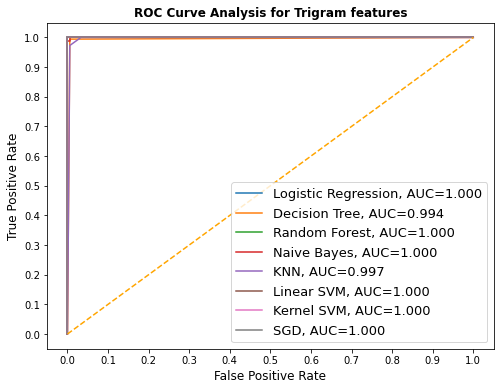

In [348]:
from utils import plot_roc_curve,ml_models_for_trigram_tfidf
## classifiers defination
gram_models = ml_models_for_trigram_tfidf()

plot_roc_curve(gram_models,X_train,X_test,y_train,y_test,'Trigram')

### Precision-Recall

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


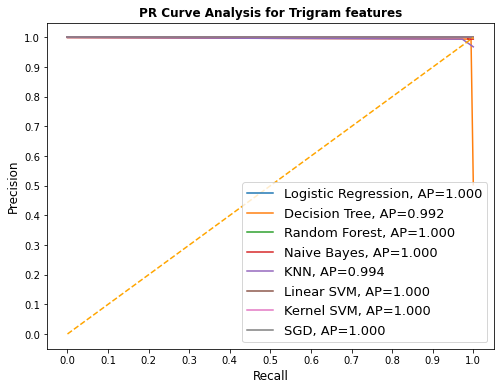

In [349]:
from utils import plot_PR_curve,ml_models_for_trigram_tfidf
## classifiers defination
gram_models = ml_models_for_trigram_tfidf()

plot_PR_curve(gram_models,X_train,X_test,y_train,y_test,'Trigram')

## Final Model

- Selected Feature: Unigram
- Selected Model : Multinomial Naive Bayes

In [350]:
from sklearn.naive_bayes import MultinomialNB

from utils import label_encoding,dataset_split
from utils import calc_unigram_tfidf

# calculate the Unigram Tf-idf feature
cv,feature_vector = calc_unigram_tfidf(data.cleaned) 
# Encode the labels
lables = label_encoding(data.Sentiment,False)
# Split the Feature into train and test set
#X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,sentiment=lables)
X_train, X_test, y_train, y_test = train_test_split(feature_vector, lables, 
                                                    test_size=0.3, 
                                                    random_state=70,
                                                    shuffle=True)


In [351]:
from sklearn.metrics import accuracy_score
mnb_model = MultinomialNB(alpha=0.15)
mnb_model.fit(X_train,y_train) 
y_pred = mnb_model.predict(X_test)
accuracy_score(y_true=y_test,y_pred=y_pred)*100

99.09297052154194

### Saved the model for reuse again

In [354]:
import pickle
# open a file, where you ant to store the data
file = open('book_review_mnb.pkl', 'wb')

# dump information to that file
pickle.dump(mnb_model, file)

In [355]:
model = open('book_review_mnb.pkl','rb')
nb = pickle.load(model)

In [356]:
y_pred = nb.predict(X_test)
accuracy_score(y_test,y_pred)

0.9909297052154195

## Check a Review Sentiment using our model

In [357]:
# load the model
model = open('book_review_mnb.pkl','rb')
nb = pickle.load(model)
######
review = 'aaaasd asd asdasd asd'
# Process the reviews
processed_review = process_reviews(review,stopwords = stopwords_list,removing_stopwords = True)

# calculate the Unigram Tf-idf feature
cv,feature_vector = calc_unigram_tfidf(data.cleaned) 
feature = cv.transform([processed_review]).toarray()

sentiment = nb.predict(feature)

if (sentiment ==0):
    print(f"It is a Negative Review ")
else:
    print(f"It is a Positive Review ")


It is a Negative Review 


In [358]:
sentiment = nb.predict_proba(feature)
round(max(sentiment.reshape(-1)),2)*100

50.0

In [359]:
review = 'aaaasd asd asdasd asd'
# Process the reviews
processed_review = process_reviews(review,stopwords = stopwords_list,removing_stopwords = True)
processed_review

''